# Inference of flows from kymographs with optimal transport

In [1]:
import xlrd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm

In [16]:
filename = "Actin_data.xlsx"
book = xlrd.open_workbook(filename)
Excel_file = pd.read_excel(filename,sheet_name='Avg')
Time_serie = np.array(Excel_file)

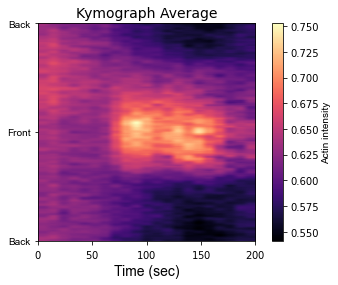

In [17]:
tmax = 21
plt.imshow(Time_serie[:,:tmax],plt.cm.magma,extent=(0,1,0,1))
plt.title("Kymograph Average",size=14)
plt.yticks([0, 0.5, 1])
plt.xticks(np.linspace(0,1,5))
labels = ["Back","Front","Back"]
labels_r = ["$0$","$50$","$100$","$150$","$200$"]
ax = plt.gca()
ax.set_yticklabels(labels,family='Arial')
ax.set_xticklabels(labels_r,family='Arial')

plt.xlabel("Time (sec)",size=14,family='Arial')
cbar = plt.colorbar()
cbar.set_label('Actin intensity',family='Arial')#, rotation=270)



In [5]:
from optiflow import define_matrices, compute_displacements_from_kymograph
import numpy as np 
n = len(Time_serie)
C,D = define_matrices(npoints = n,plot=True)

NameError: name 'Time_serie' is not defined

# Compute individual kymographs with optimal transport

In [12]:
V=[]
n = 799

list_names = book.sheet_names()[:-1]

for k,name in enumerate(tqdm(list_names,total = 26)) :
    
    Excel_file = pd.read_excel(filename,sheet_name=name)
    Time_serie = np.array(Excel_file)[:,:tmax+1]
    try : 
        velocities = compute_displacements_from_kymograph(Time_serie,C,D)
        V.append(velocities.copy())
    except : 
        pass
np.save("Velocities_actin.npy",V)

 15%|█▌        | 4/26 [01:11<06:33, 17.91s/it]/Users/sachaichbiah/opt/anaconda3/lib/python3.8/site-packages/ot/lp/__init__.py:343: UserWarning: Problem infeasible. Check that a and b are in the simplex
  result_code_string = check_result(result_code)
100%|██████████| 26/26 [06:59<00:00, 16.15s/it]


# Average these velocities and plot them

In [2]:
V = np.load("Velocities_actin.npy",allow_pickle=True)
Mean_velocities= (np.mean(V,axis=0))

100%|██████████| 21/21 [00:00<00:00, 669.49it/s]


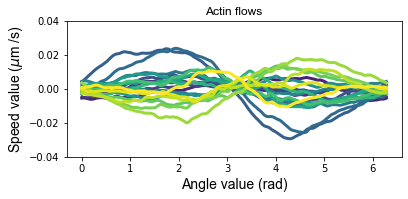

In [3]:
tmax = 21
plt.figure(figsize = (6,2.5))
for t in tqdm(range(tmax)): 
    n = len(Mean_velocities)
    color = plt.cm.viridis(t/(tmax-1))   #to invert cm replace this line by : color = cm(1-t/tmax)
    plt.plot(np.arange(n)*2*np.pi/n,(20*np.pi/4.5977/2)*Mean_velocities[:,t]*(2*np.pi/n)/10,color = color,linewidth = 3)

    plt.ylim(-0.04,0.04)
plt.ylabel("Speed value ($\mu$m /s)",size=14,family='Arial')
plt.xlabel("Angle value (rad)",size=14,family='Arial')
plt.title("Actin flows",family='Arial')
plt.savefig("Transport_plots_circular_actin.pdf",transparent=True,bbox_inches='tight')

# Visualization with polyscope

In [10]:
time_point = 7
Mean_velocities[np.isnan(Mean_velocities)]=0
plot_vector_field(Mean_velocities,t=time_point,pool_size = 25)